#Ejemplos prácticos de una red  de Kohonen

##Ejemplo N. 1

In [27]:
#Self organizing map clustering algorithm
# The Academician
import numpy as np, numpy.random
from scipy.spatial import distance #para la distancia euclidiana


klusters = 2
p = 0
alpha = 0.7 # Initial learning rate

X = np.array( [
              [1,1,0,0], 
              [0,1,0,0], 
              [0,0,1,0], 
              [0,0,1,1]
              ])

N_filas    = len(X)    #n
N_columnas = len(X[0]) #d

addZeros = np.zeros((N_filas, 1))
X = np.append(X, addZeros, axis=1) #Agregar un columna de ceros a los datos de entrada

C = np.zeros((klusters,N_columnas+1))

#Print the number of data and dimension 
print("The SOM algorithm: \n")
print("The training data: \n", X)
print("\nTotal number of data: ", N_filas)
print("Total number of features: ", N_columnas)
print("Total number of Clusters: ",klusters)

weight = np.random.rand(N_filas,klusters)
print("\nPesos:\n",weight, "\n\nX:\n",X)

The SOM algorithm: 

The training data: 
 [[1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0.]]

Total number of data:  4
Total number of features:  4
Total number of Clusters:  2

Pesos:
 [[0.34596602 0.11225639]
 [0.54263149 0.63514758]
 [0.41413285 0.26997167]
 [0.66782091 0.14796561]] 

X:
 [[1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0.]]


In [ ]:
#Ver los valores iniciales
Entrada = 0
Peso = 0
Entrada = X[0,0:N_columnas]
Peso = weight[:,0]
print("Ejemplo primer valor de los datos\n ")
print("Entrada 1: ",Entrada,"\nPeso    1: ",Peso)
dist0 = np.square(distance.euclidean(Peso,Entrada))
print("\nDistancia euclidiana: ",dist0)

Ejemplo primer valor de los datos
 
Entrada 1:  [1. 1. 0. 0.] 
Peso    1:  [0.52980485 0.60628746 0.74520228 0.89337512]

Distancia euclidiana:  1.7295385814108233


In [ ]:
#Valor individual de la distancia euclidiana
index = 0
dist1 = 0
dif2  = 0
for val in Entrada:
  dif2 += (Peso[index]-val)**2
  print(dif2)
  index += 1
dist1 = np.sqrt(dif2)
print("Dist = " , dist1)

0.22108348113963733
0.3760930443611617
0.9314194786583874
1.7295385814108235
Dist =  1.3151192270706193


In [ ]:
dist=0
for it in range(20): # Total number of iterations
    for i in range(N_filas):
        distMin = 999999
        for j in range(klusters):
            dist = np.square(distance.euclidean(weight[:,j], X[i,0:N_columnas])) #Distancia entre los vectores de entrada y el vector de pesos asociado
            print("Distancia euclidiana: ",dist)
            if distMin>dist:
                distMin = dist
                jMin = j
        weight[:,jMin] = weight[:,jMin]*(1-alpha) + alpha*X[i,0:N_columnas]   
    #alpha = 0.5*alpha
    
# print("\nThe final weight: \n",np.round(weight,4))

for i in range(N_filas):    
    cNumber = np.where(weight[i] == np.amax(weight[i]))
    X[i,N_columnas] = cNumber[0]

print("\nThe data with cluster number: \n", X)

##Ejemplo N. 2


In [ ]:
"""
Kohonen SOM in python
"""
import numpy as np
import matplotlib.pyplot as plt


"""
Global parameters
"""
N = 20 # linear size of 2D map
n_teacher = 10000 # # of teacher signal
np.random.seed(100)# test seed for random number

def main():
    # initialize node vectors
    nodes = np.random.rand(N,N,3)# node array. each node has 3-dim weight vector
    #initial out put
    #TODO; make out put function to simplify here 
    plt.imshow(nodes, interpolation='none')
    plt.savefig("init.png")
    """"""
    """ Learning """
    """"""
    # teacher signal
    teachers = np.random.rand(n_teacher,3)
    for i in range(n_teacher):
        train(nodes, teachers, i)
        # intermediate out put
        if i%1000 ==0 or i< 100: #out put for i<100 or each 1000 iteration
            plt.imshow(nodes, interpolation='none')
            plt.savefig(str(i)+".png")
    #output
    plt.imshow(nodes, interpolation='none')
    plt.savefig("final.png")
    
def train(nodes, teachers, i):
    bmu = best_matching_unit(nodes, teachers[i])
    #print bmu
    for x in range(N):
        for y in range(N):
            c = np.array([x,y])# coordinate of unit
            d = np.linalg.norm(c-bmu)
            L = learning_ratio(i)
            S = learning_radius(i,d)
            for z in range(3): #TODO clear up using numpy function
                nodes[x,y,z] += L*S*(teachers[i,z] - nodes[x,y,z])



def best_matching_unit(nodes, teacher):
    #compute all norms (square)
    #TODO simplify using numpy function
    norms = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            for k in range(3):
                norms[i,j] += (nodes[i,j,k] - teacher[k])**2
    #then, choose the minimum one
    bmu = np.argmin(norms) #argment with minimum element 
    # argmin returns just flatten, serial index, 
    # so convert it using unravel_index
    return np.unravel_index(bmu,(N,N))

def neighbourhood(t):#neighbourhood radious
    halflife = float(n_teacher/4) #for testing
    initial  = float(N/2)
    return initial*np.exp(-t/halflife)

def learning_ratio(t):
    halflife = float(n_teacher/4) #for testing
    initial  = 0.1
    return initial*np.exp(-t/halflife)

def learning_radius(t, d):
    # d is distance from BMU
    s = neighbourhood(t)
    return np.exp(-d**2/(2*s**2))

main()


##Ejemplo N. 3



In [106]:
import sys
import numpy as np
import matplotlib.pyplot as cm
import matplotlib.pyplot as plt
import random
import math
from random import randrange

'''
application of Kohonen Network on random colours
I create a random colour map, then proceed to train it upon user specified amount of epochs, 
learning rate, and file prefix.
'''

#function to generate colour vectors, takes n as number of colours to be generated for clustering
def Gen_Colours(n):
    colours =  []
    for x in range(n):
        colours.append([random.random(),random.random(),random.random()])
    return colours

#function to create a map of colour vectors
def Gen_Image(colors, x, y):
    img = []
    for row in range(x):
        for col in range(y):
            img.append(colors[randrange(len(colors))])
    img  = np.asarray(img, dtype=np.float32)
    img = img.reshape(x, y, 3)
    return img

#Func to calculate the euclidean distance between vectors
def Euclidean_Dist(V, t): 
    distance = np.sum(np.square(V-t))
    return distance

#Func to find the best matching unit
def findBMU(init_image,map,RandX,RandY,Ox,Oy):
    #randomize centroid x and y values
    centroid = random.randint(0,len(map)),random.randint(0,len(map))
    temp = math.inf

    #returns centroid considered to be bmu
    for x in range(len(map)):
        for y in range(len(map)):
            distance = Euclidean_Dist(map[x][y],init_image[x][y])
            if distance > temp:
                temp = distance
                centroid = [x,y]

    return centroid

#input vector, initial learning rate, m = map, im = img, x and y are dimensions, fname is specified by user
def Iterate(input, lr, m, im, x , y):
     #formatting of saves
    counter = 1
    img_num = 1

    for S in range(input):
        #choose random input vector (x,y)
        RandX = random.randint(0,len(m)-1)
        RandY = random.randint(0,len(m)-1)

        #learning rate decay
        CONST = (1.0 - ((S*1.0)/input))
        
        #find best matching unit
        bmu = findBMU(im, m, RandX, RandY, len(m), len(m))

        #modification of learning rate
        emp = int(CONST * max_range)
        learningrate = CONST * lr

        #modify vector positions within neighbourhood using euclidean distance and bmu
        for i in range(x):
            for j in range(y):
                distance = Euclidean_Dist(np.array(bmu),np.array([i,j])) 
                if distance < emp:
                    m[i][j] = m[i][j] + learningrate * (init_image[RandX][RandY] - m[i][j])

        #file_name = "{}{}".format(fname, img_num)

        plt.imshow((map*255).astype(np.uint8))
        plt.show(block = False)
        plt.close()

        #display new map after each epoch
        #save the img every 50 epochs
        # if counter == 50: 
        #     #counter is reset to 1 after 50 epochs is hit
        #     counter = 1
        #     img.set_data((m*255).astype(np.uint8));
        #     # cm.pause(0.0001)
        #     cm.draw()
        #     plt.imshow((m*255).astype(np.uint8))
        #     plt.show()
        #     cm.savefig(file_name)
        #     img_num = img_num + 1
        # else:
        #     #if not 50th epoch proceed as normal
        #     img.set_data((m*255).astype(np.uint8))
        #     # cm.pause(0.0001)
        #     cm.draw()
        
        # counter = counter + 1

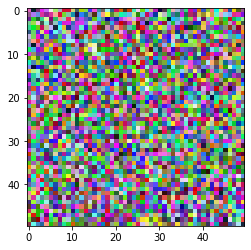

In [132]:
#dimensions of map specified here
x = 50
y = 50
max_range = x + y 

#create initial colour map
init_image = Gen_Image(Gen_Colours(1000), x, y)

img = cm.imshow((init_image*255).astype(np.uint8))
map = np.random.rand(x,y,3)

In [133]:
Epoch = 900
lr = 0.5
Iterate(Epoch, lr, map, init_image, x, y)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#dimensions of map specified here
x = 200
y = 200
max_range = x + y 

#create initial colour map
init_image = Gen_Image(Gen_Colours(5), x, y)
img = cm.imshow((init_image*255).astype(np.uint8))
map = np.random.rand(x,y,3)

#USER INPUT FIELDS FOR EPOCHS, LEARNING RATE, AND FILE PREFIX
#user specifies number of epochs to be run
num_epoch = int(input("Please Enter # of Epoch's (recommended 200-1000): "))

#User specifies Learning rate
lr = float(input("Please Enter Learning rate (recommended 0.1-0.9): "))

#User specifies file prefix
fn = str(input("Please Enter String for file prefix: "))

#Algorithm iterates here
Iterate(num_epoch, lr, map, init_image, x, y, fn)


#display final plt/image
plt.imshow((map*255).astype(np.uint8))
plt.show()


  0%|          | 0/50000 [00:00<?, ?it/s]

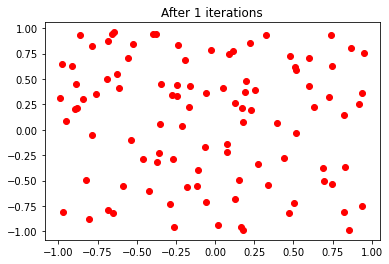

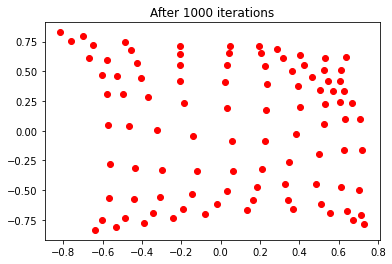

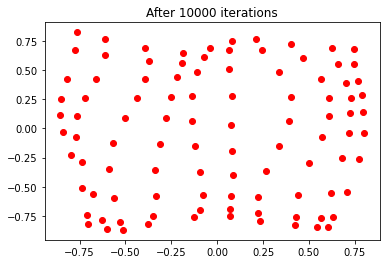

KeyboardInterrupt: ignored

In [ ]:
# Importing Libraries
import math
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

# Generating Data : using uniform random number generator
data_ = np.random.uniform(-1, 1, (1500, 2))
# print(data_.shape)

# Hyperparameter Initialization
x, y = 10, 10	 # dimensions of Map
sigma = 1.		 # spread of neighborhood
learning_rate = 0.5 # learning rate
epochs = 50000	 # no of iterations
decay_parameter = epochs / 2 # decay parameter

# Activation map and Assigning Weights
# using random number generation
activation_map = np.zeros((x, y))
weights = 2 * (np.random.ranf((x, y, data_.shape[1])) - 0.5)
# print(weights.shape)

# Define Neighborhood Region
neighbour_x = np.arange(x)
neighbour_y = np.arange(y)

# Function: decay_learning_rate_sigma
def decay_learning_rate_sigma(iteration):
  learning_rate_ = learning_rate/(1 + iteration / decay_parameter)
  sigma_ = sigma / (1 + iteration / decay_parameter)
  return learning_rate_, sigma_

# Function: to get winner neuron
def get_winner_neuron(x):
  s = np.subtract(x, weights) # x - w
  it = np.nditer(activation_map, flags =['multi_index'])
  while not it.finished:
    # || x - w ||
    activation_map[it.multi_index] = np.linalg.norm(s[it.multi_index])
    it.iternext()

  return np.unravel_index(activation_map.argmin(), activation_map.shape)

# Update weights
def update_weights(win_neuron, inputx, iteration):
  # decay learning rate and sigma
  learning_rate_, sigma_ = decay_learning_rate_sigma(iteration)

  # get neighborhood about winning neuron (Mexican hat function)
  d = 2 * np.pi * (sigma_**2)
  ax = np.exp(-1 * np.square(neighbour_x - win_neuron[0]) / d)
  ay = np.exp(-1 * np.square(neighbour_y - win_neuron[1]) / d)

  neighborhood = np.outer(ax, ay)

  it = np.nditer(neighborhood, flags = ['multi_index'])
  while not it.finished:
    weights[it.multi_index] += learning_rate_ * neighborhood[it.multi_index]* (inputx - weights[it.multi_index])
    it.iternext()

  # Training model: Learning Phase
for epoch in tqdm(range(1, epochs + 1)):
  np.random.shuffle(data_)
  idx = np.random.randint(0, data_.shape[0])
  win_neuron = get_winner_neuron(data_[idx])
  update_weights(win_neuron, data_[idx], epoch)

  if epoch == 1 or epoch == 100 == 0 or epoch == 1000 or epoch == 10000 or epoch == 50000:
    plot_x = []
    plot_y = []

    for i in range(weights.shape[0]):
      for j in range(weights.shape[1]):
        plot_x.append(weights[i][j][0])
        plot_y.append(weights[i][j][1])

    plt.title('After ' + str(epoch) + ' iterations')
    plt.scatter(plot_x, plot_y, c = 'r')
    plt.show()
    plt.close()


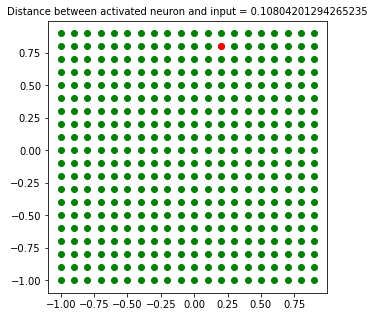

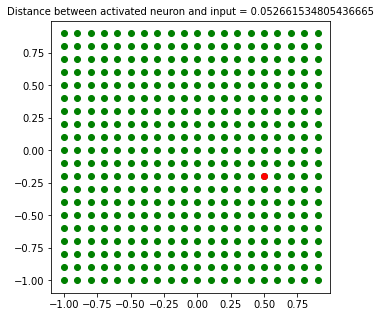

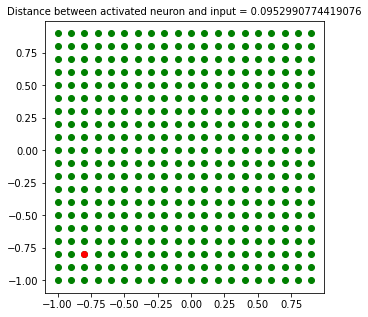

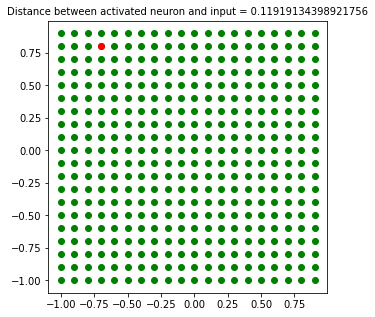

In [ ]:
# Testing the model performance
test_inputs = np.array([[0.1, 0.8], [0.5, -0.2], [-0.8, -0.9], [-0.6, 0.9]]) 
# print(test_inputs.shape) 
  
# The plots below depict the working of this Kohonen Network on 
# given test inputs [0.1, 0.8], [0.5, -0.2], [-0.8, -0.9], [-0.6, 0.9]
for i in range(test_inputs.shape[0]):
  test_input = test_inputs[i, :]
  win_neuron = get_winner_neuron(test_input)
  
  plot_x = np.arange(-1, 1, 0.1)
  plot_y = np.arange(-1, 1, 0.1)
  xx, yy = np.meshgrid(plot_x, plot_y)
  
  coordx, coordy = weights[win_neuron[0]][win_neuron[1]][0],weights[win_neuron[0]][win_neuron[1]][1]
  dist = math.sqrt((coordx-test_input[0])**2 + (coordy - test_input[1])**2)
  coordx = round(coordx, 1)
  coordy = round(coordy, 1)
  
  plt.figure(figsize =(5, 5))
  plt.title("Distance between activated neuron and input = " + 
            str(dist), fontsize = 10)
  plt.scatter(xx, yy, c = 'g')
  plt.scatter(coordx, coordy, c = 'r')
  plt.show()
  plt.close()

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

class kohonen(object):
    
    def __init__(self, input_lenght, size_x = 25, size_y = 10,  learning_rate = 0.1 , neighbour_radious = 4, neighbour_function_type = 1):
        self.size_x = size_x
        self.size_y = size_y
        self.learning_rate = learning_rate
        self.neighbour_radious = neighbour_radious
        self.neighbour_function_type = neighbour_function_type
        self.input_lenght = input_lenght
        # initializes net with size x,y and random initial values from range [0.25,0.5)
        self.neurons = ((np.random.random((size_x, size_y, input_lenght)) + 3) /4) -0.5
    
        self.__distribution = self.gaussian_distribution()
        
        self.eta = self.learning_rate
        self.r = self.neighbour_radious
        
        self.u_matrix = None
        
    def gaussian_distribution(self, mean = 0, variance = 1):
        sigma = math.sqrt(variance)
        x=np.linspace(mean + 3 * sigma, 100)
        return x
        
    def weight_metric(self,ivector):
        #euclidian distance
        z = np.sum((self.neurons - ivector)**2, axis=-1)
        return np.sqrt(z)
    
    
    def metric(self, xi, yi, xw, yw):
        #euclidian distance
        return math.sqrt((xw-xi)**2 + (yw-yi)**2)
    
    def n_fun(self, xi, yi, xw, yw, r):
        #gaussian function
        if self.neighbour_function_type:
            d = self.metric(xi,yi,xw,yw)
            if d <= r:
                return self.__distribution[math.floor((d/r)*49)]
            else:
                return 0
        
        #binary function
        else:
            return self.metric(xi, yi, xw, yw) >= r
    #todo    
    def n_matrix(self, xw, yw, r):
        nm = np.zeros((self.size_x, self.size_y))
        mx,nx,my,ny = self.boundries(xw, yw, r)
        for x in range(mx,nx):
            for y in range(my,ny):
                nm[x][y]=self.n_fun(x, y, xw, yw, r)
        return nm
                
              
    def winner(self, ivector):
        index_min = np.argmin(self.weight_metric(ivector), axis=1)
        return index_min[0], index_min[1]

    
    def boundries(self, x, y, r):
        return (math.floor(max(x - r, 0)), math.floor(min(x + r, self.size_x)), math.floor(max(y - r, 0)), math.floor(min(y + r, self.size_y)))
    
    def learn(self, input_vector):
        eta = self.eta
        r = self.r
        for ivector in input_vector:
            x, y = self.winner(ivector)
            self.neurons += eta * self.n_matrix(x, y, r)[:, :, np.newaxis] * (self.neurons - ivector)
        self.decay()
        
    #todo: exp time decay
    def decay(self):
        self.eta -= self.eta/10
        self.r -= self.r/2
      
    def reference_neurons(self, positive, negative):
        return self.winner(positive), self.winner(negative)
    
    #needs optimization 
    def u_matrix_calculation(self):
        u_matrix = np.zeros((2*self.size_x -1, 2*self.seize_y - 1))
        for x in range(self.size_x - 1):
            for y in range(self.size_y - 1 ):
                u_matrix[2*x, 2*y] = self.neurons[x,y]
                u_matrix[2*x +1, 2*y] = self.euclidean(self.neurons[x,y], self.neurons[x+1,y])
                u_matrix[2*x, 2*y +1] = self.euclidean(self.neurons[x,y], self.neurons[x,y+1])
                u_matrix[2*x +1, 2*y +1] = 0,5*(u_matrix[2*x +1, 2*y] + u_matrix[2*x, 2*y +1])/np.sqrt(2)
        u_matrix[2*self.size_x - 2, 2*self.size_y - 2] = self.neurons[self.size_x - 1, self.size_y - 1]
        self.u_matrix = u_matrix
        
    def get_clusters(self):
        #get watershed markers with opencv
        #get boundries
        #set clusters within boundries
        #return clusters
        pass             
        
    
    def heat_map(self, vector):
        z = self.weight_metric(vector)
        plt.imshow(z, cmap='hot', interpolation='nearest')
        plt.show()
     
        
    def reset(self):
        self.r = self.neighbour_radious
        self.eta = self.learning_rate